<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#env-set-up" data-toc-modified-id="env-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>env set-up</a></span></li><li><span><a href="#functions" data-toc-modified-id="functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>functions</a></span></li><li><span><a href="#data-exploration" data-toc-modified-id="data-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>data exploration</a></span></li><li><span><a href="#effect-of-initial-condition" data-toc-modified-id="effect-of-initial-condition-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>effect of initial condition</a></span></li><li><span><a href="#maximum-carbon-removal-limits" data-toc-modified-id="maximum-carbon-removal-limits-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>maximum carbon removal limits</a></span><ul class="toc-item"><li><span><a href="#env-set-up" data-toc-modified-id="env-set-up-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>env set-up</a></span></li><li><span><a href="#function" data-toc-modified-id="function-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>function</a></span></li><li><span><a href="#parameter-test" data-toc-modified-id="parameter-test-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>parameter test</a></span></li></ul></li></ul></div>

# env set-up

In [1]:
library(repr) ; options(repr.plot.width=18, repr.plot.height= 10) ## change plot default parameter in Jupyter
source("../code/func.R") ## import lib, model, func
rAw = read.csv("../result/maxYield_all.csv", header=T) ## analytical scan
dIs = read.csv("../result/discrepancy_1.csv", header = T) ## discrepancies scan (analytical solve vs integration)
nUm = cbind(dIs[,1:9],dIs[,10:13]+rAw[,10:13]) ## get back numerical solution
dim(rAw)

[1] 1234321      13

In [2]:
cRaAna = rAw[which(rAw[,12]<=0),] ## data predicted to be negative (bc only B is possible to be negative)
cRaNum = nUm[which(nUm[,10]<=0 | nUm[,11]<=0 | nUm[,12]<=0 | nUm[,13]<=0),] ## data actually not positive

# functions

In [3]:
hIst = function(i){hist(dIsc[,i], main=paste0("Crashed system with ",colnames(dIsc)[i]), xlab=paste0("values of ",colnames(dIsc)[i]), cex.axis=1.5, cex.lab=1.5, cex.main=3)}

In [4]:
ebcPlt1 = function(edTm=1e3, iPop=1e-12, row=1, df=dIsc){
    pA = as.numeric(unname(df[row,1:9]))
    rEs = ebcData(endTime=edTm, iniPop=iPop, parameter=pA)
    vEc = c()
    for(i in 2:ncol(rEs)){vEc = c(vEc,rEs[,i])};rm(i)
    if(rEs[nrow(rEs),1]<edTm*.7){
        ymax = unname(quantile(vEc,prob=.55, na.rm=T))
    }else{ymax=max(vEc*1.05)}
    eQm = ebcEqm(pA)
    
    lGd = paste0(colnames(rEs)[-1],": ",signif(rEs[nrow(rEs),-1],4),"; (analytical: ", signif(c(eQm,sum(eQm)),4) ,")")

    matplot(rEs[,1],rEs[,-1], type="l", lty=1, lwd=5, col=cBp[-c(3,5)], xlab=colnames(rEs)[1], ylab="carbon density (gC/m^3)", cex.lab=2, cex.axis=2, xlim=c(0,edTm), ylim=c(0,ymax))
    legend("topright", inset=c(-.5,.05), legend = lGd, pch = rep(16,3), col = cBp[-c(3,5)], bty="n", cex = 2)}

# data exploration
Number of simulations which is actually not positive minus the number predicted being not positive

In [5]:
paste0("actually not positive: ",nrow(cRaNum),"; predicted not positive: ",nrow(cRaAna))

[1] "actually not positive: 20825; predicted not positive: 37212"

number of simulations predicted positive but actually not

In [6]:
dIcN = dIcA = c()
for(i in 1:9){ ## create unique id for filtering
    dIcN = paste0(dIcN,cRaNum[,i])
    dIcA = paste0(dIcA,cRaAna[,i])
};rm(i)
# dIsc = cRaNum[which(dIcN%in%dIcA==F),] ## when initial density small; analytical too optumistic
dIsc = cRaNum[which(dIcA%in%dIcN==F),] ## when initial density large; analytical too pessimistic
dim(dIsc)

[1] 16387    13

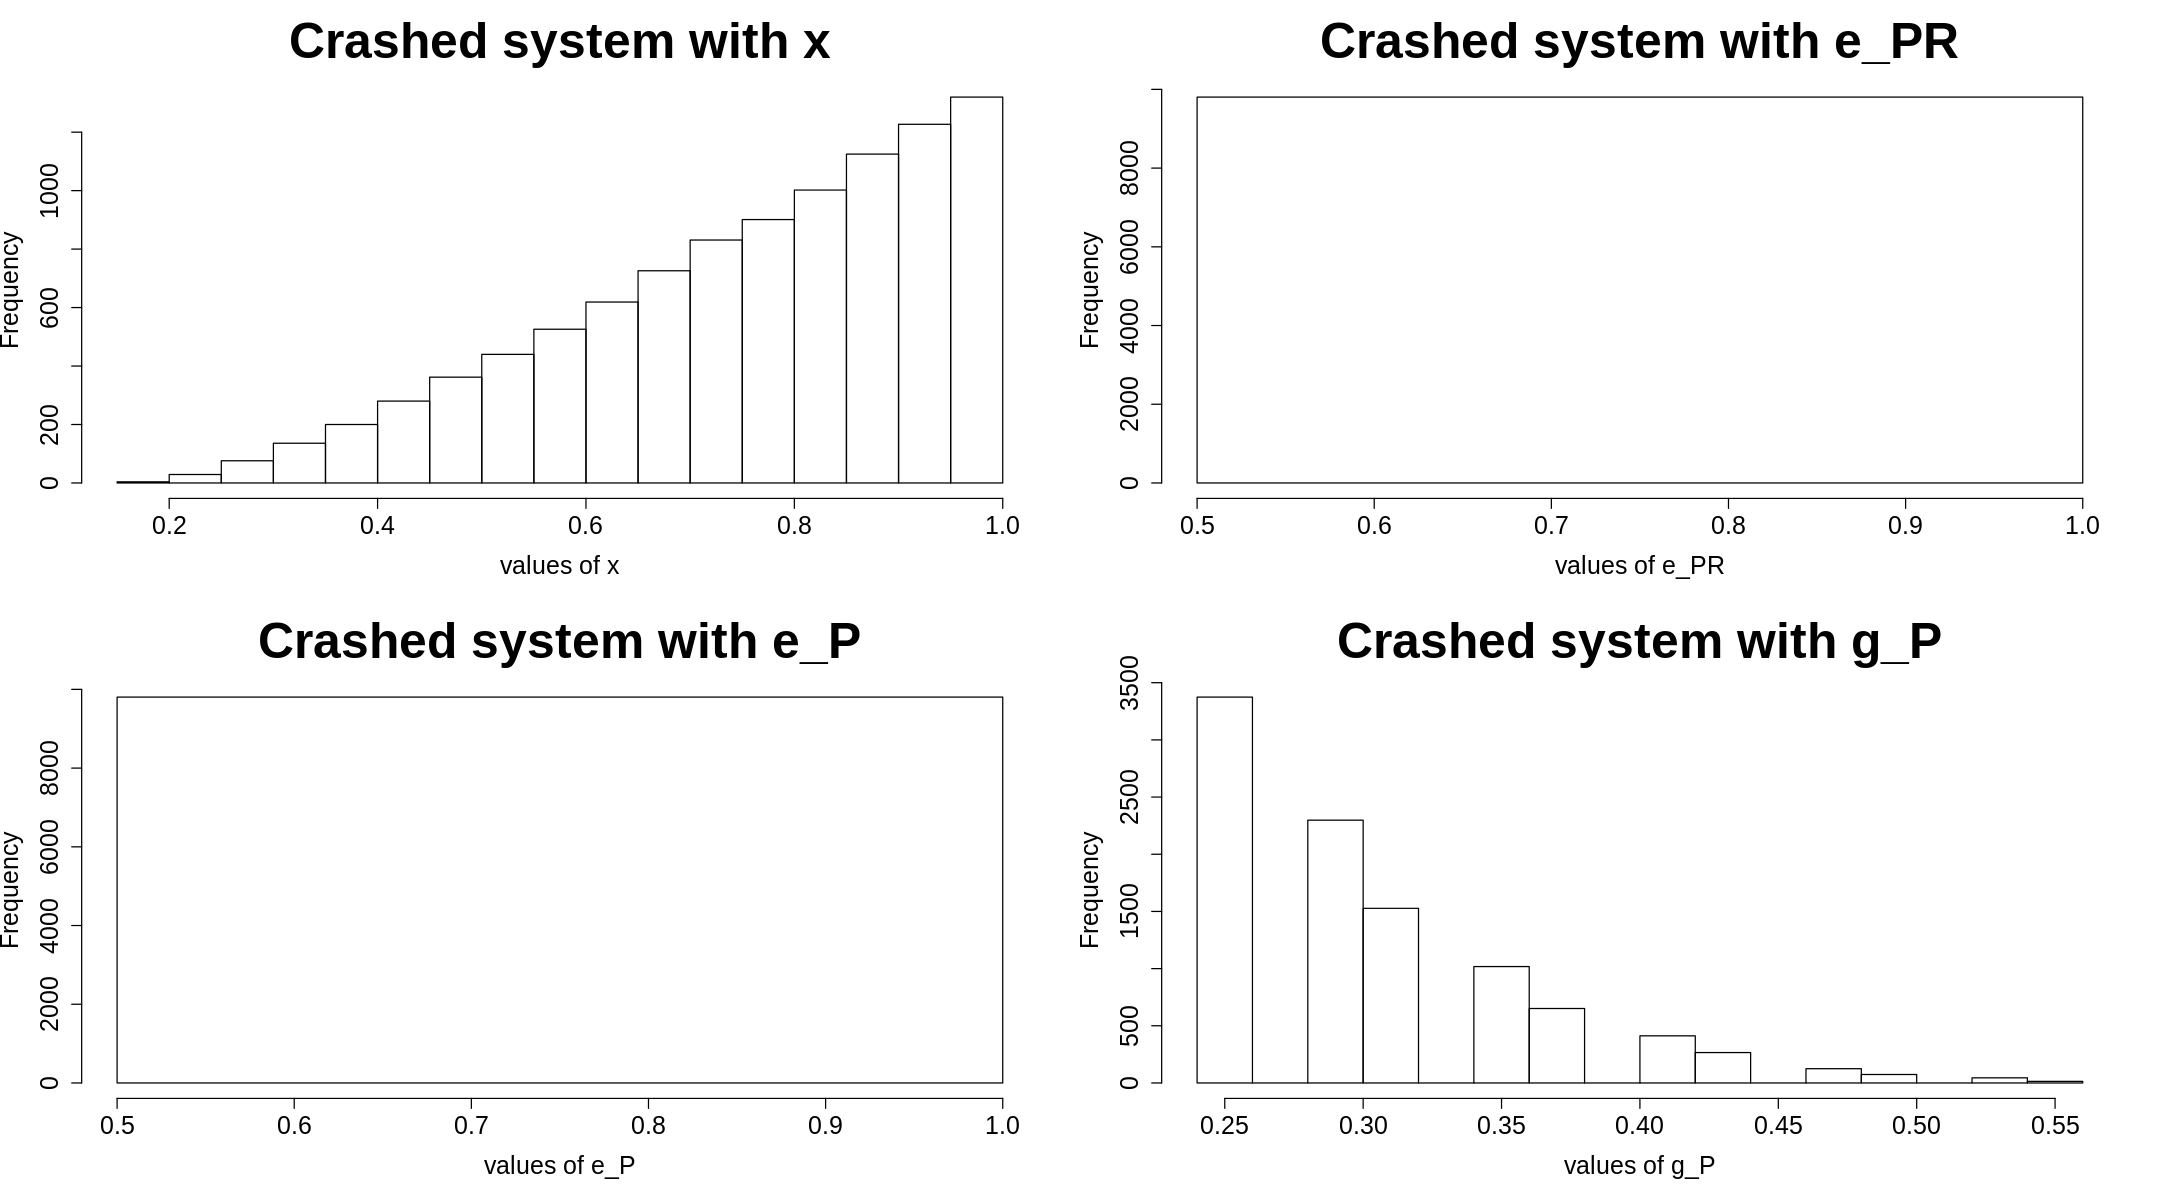

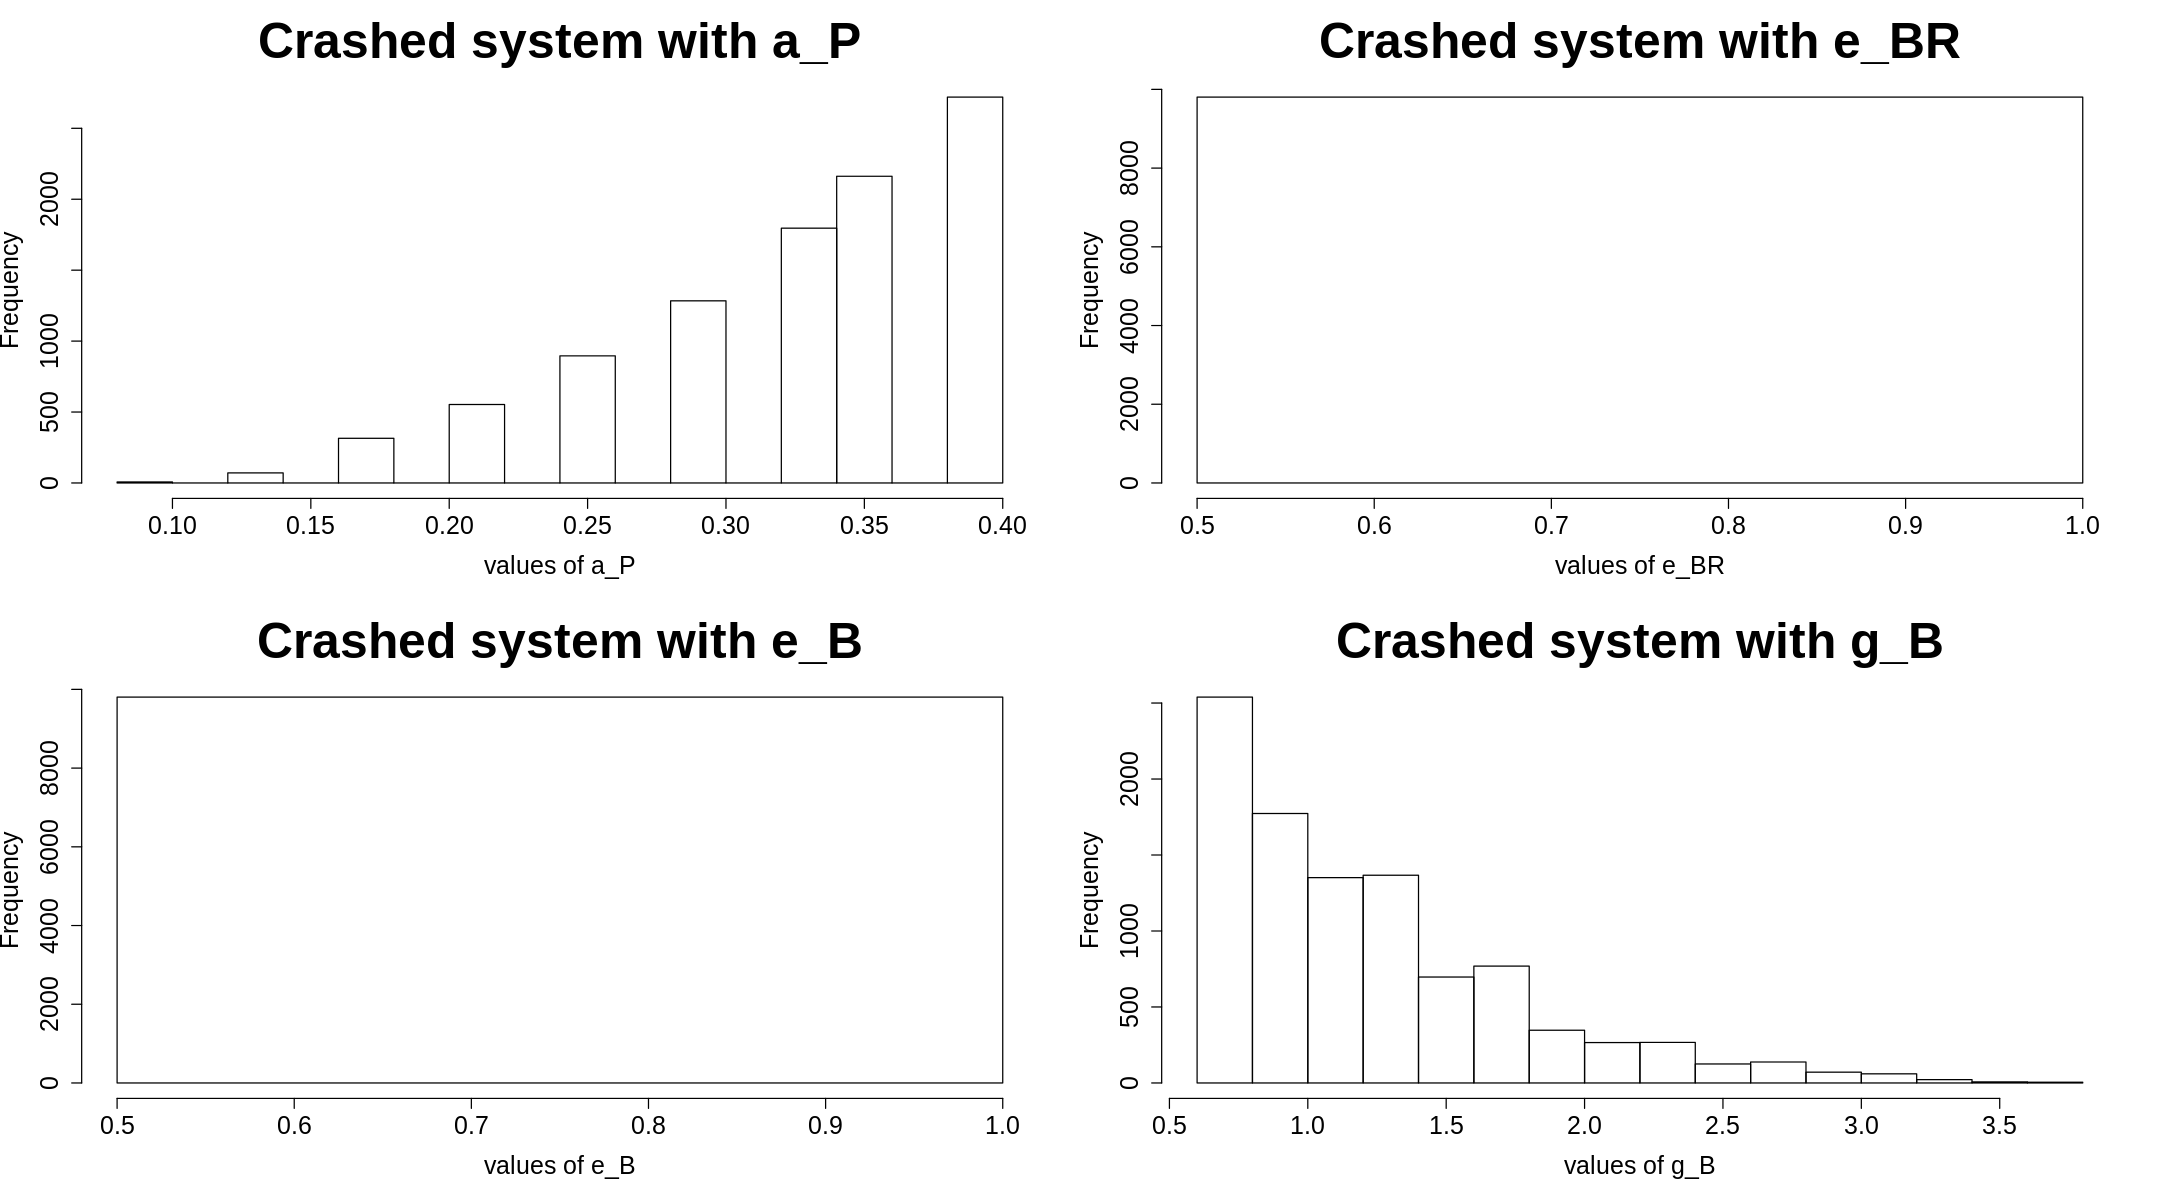

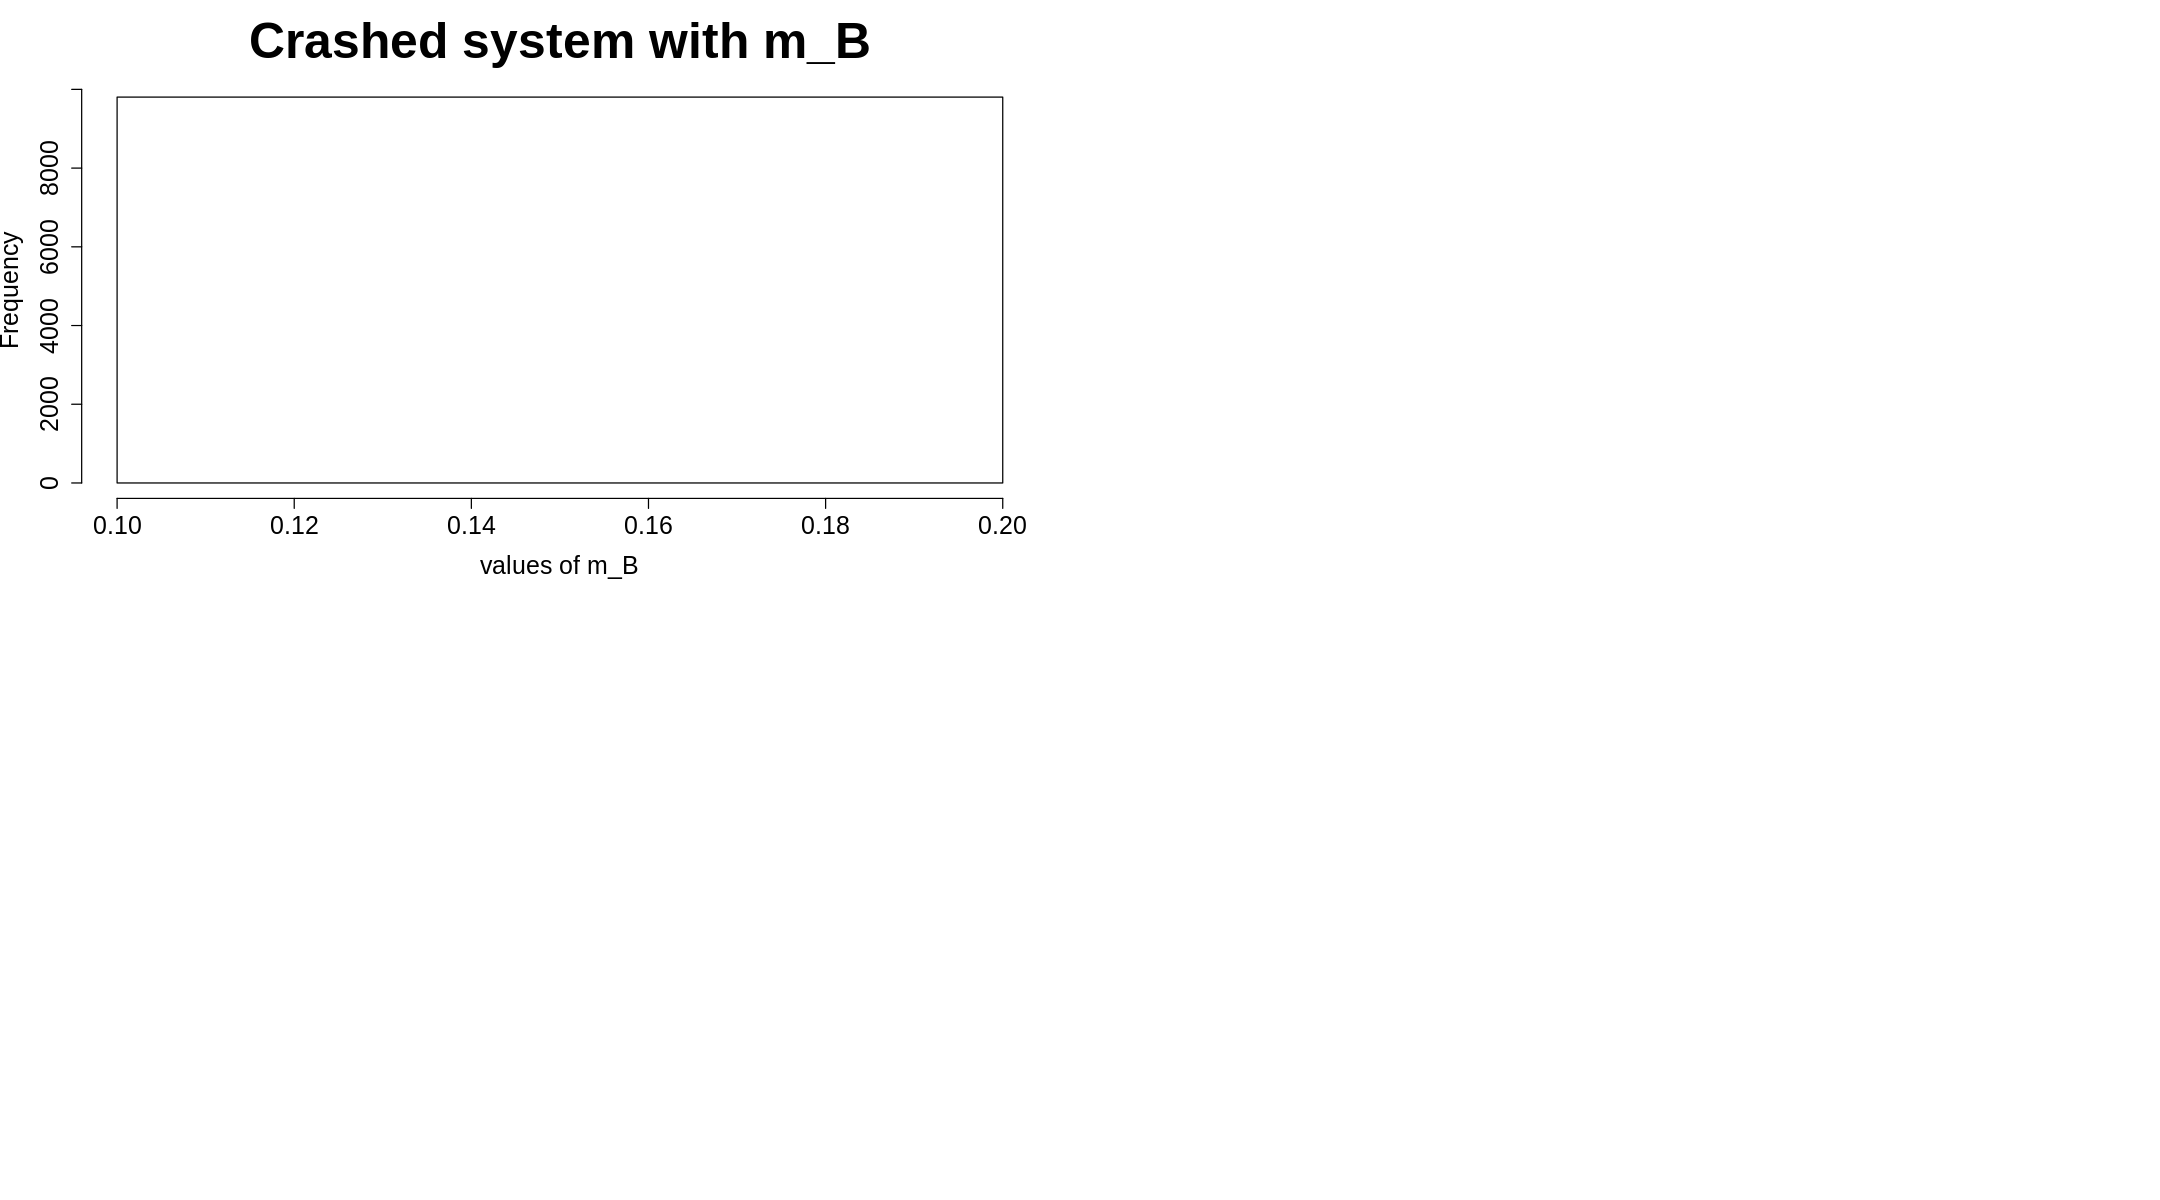

In [7]:
par(mfrow=c(2,2)) ## dIcA%in%dIcN -> pessimistic guess; dIcN%in%dIcA -> optimistic guess
for(i in 1:9){if(length(unique(dIsc[,i]))>1){hIst(i)}};rm(i)

# effect of initial condition

In [8]:
#dfTest = dIsc[which(dIsc$x==min(dIsc$x) & dIsc$g_P==min(dIsc$g_P) & dIsc$a_P==min(dIsc$a_P) & dIsc$g_B==min(dIsc$g_B)),]
dfTest = dIsc[which(dIsc$x==min(dIsc$x) & dIsc$g_P==min(dIsc$g_P) & dIsc$a_P==min(dIsc$a_P)),]
dfTest

x,e_PR,e_P,g_P,a_P,e_BR,e_B,g_B,m_B,eqmC.num.ana,eqmP.num.ana,eqmB.num.ana,eqmA.num.ana
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


ERROR: Error in plot.window(...): need finite 'ylim' values


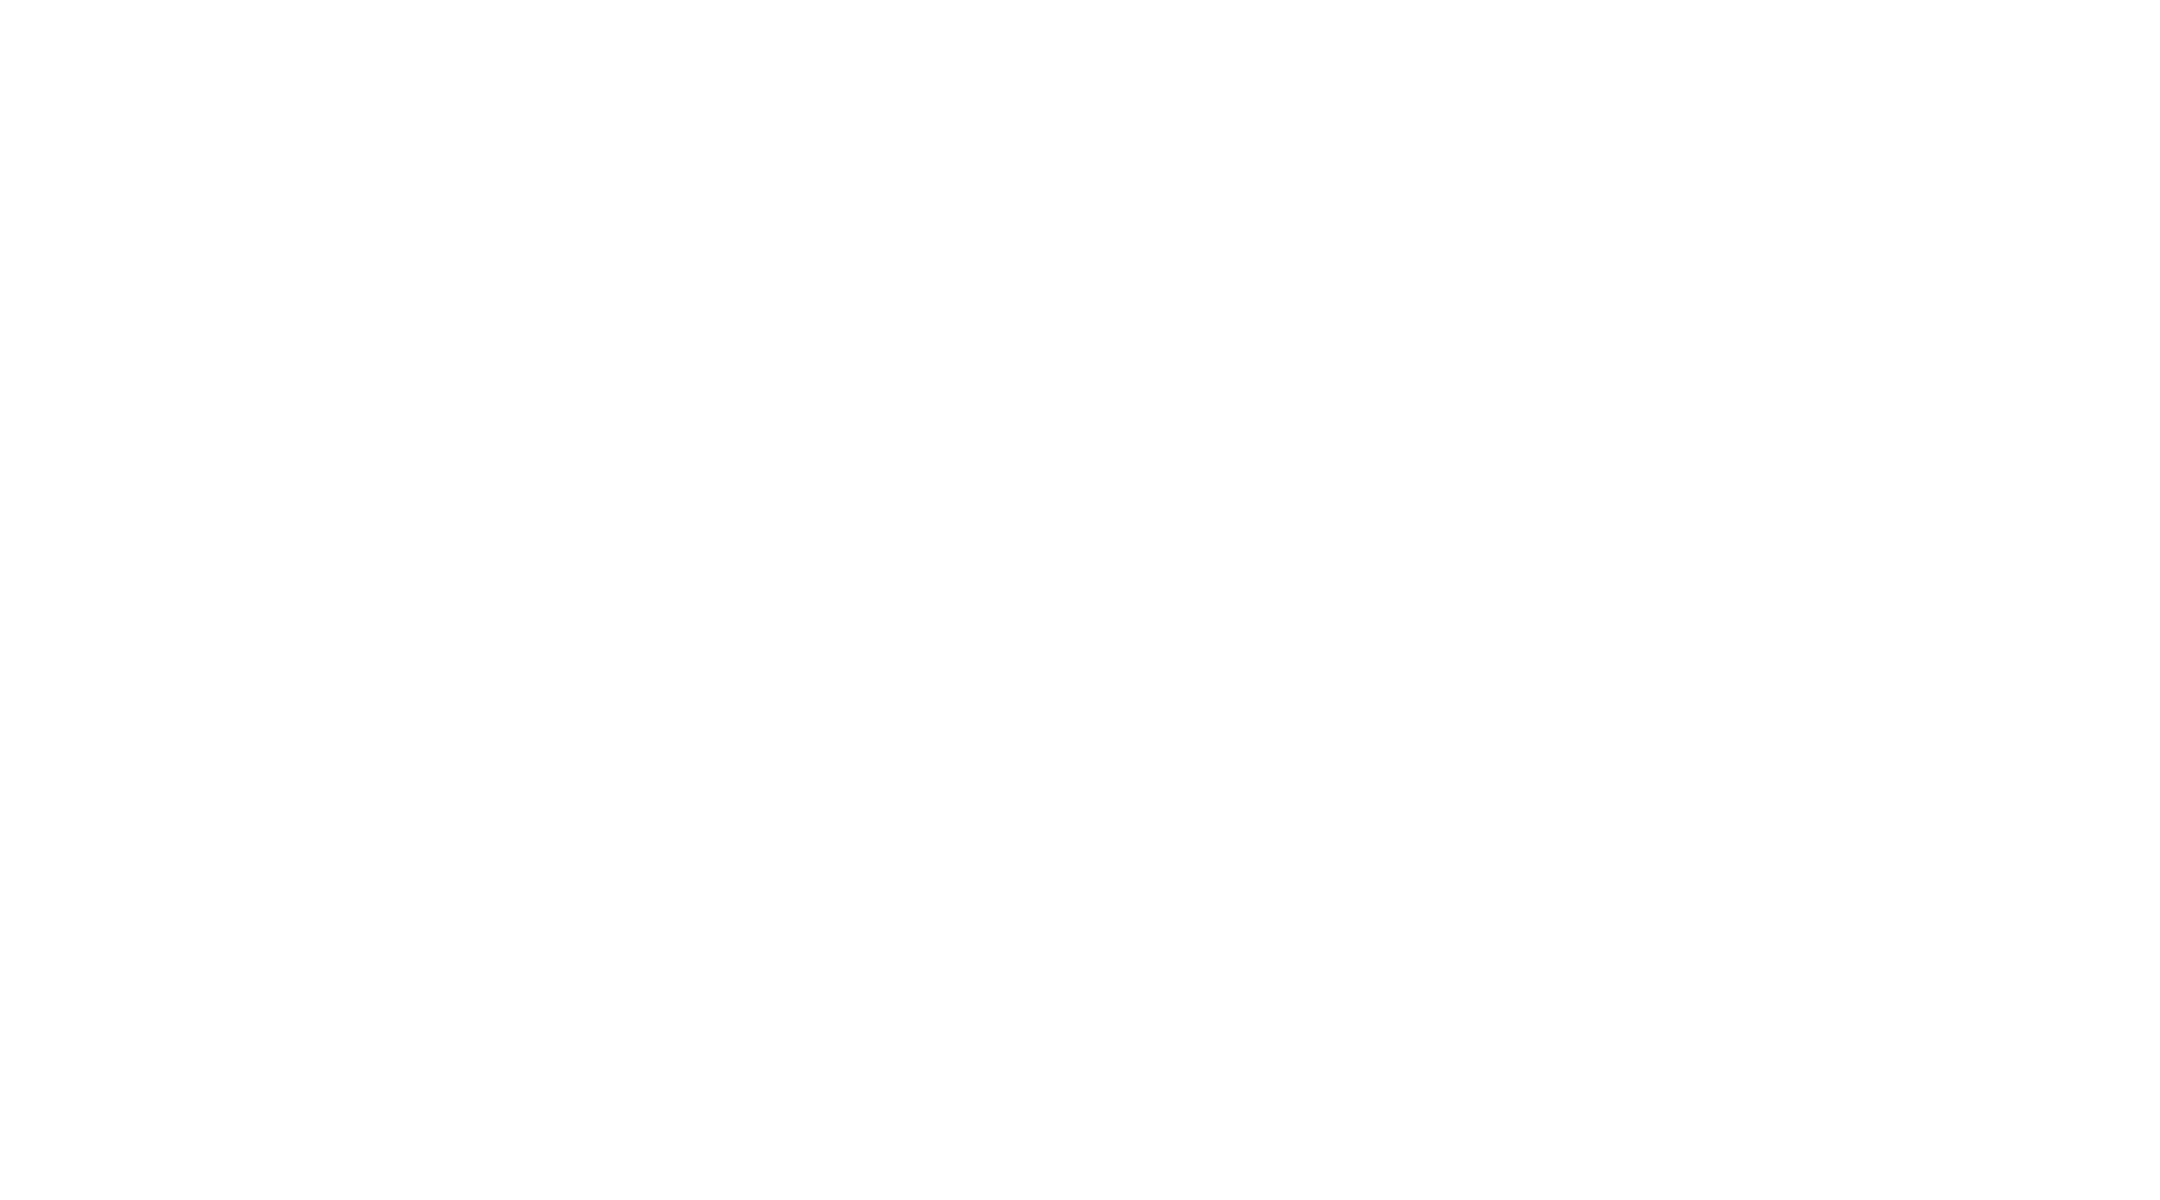

In [9]:
ebcPlt1(df=dfTest)

In [ ]:
ebcPlt1(iPop=ebcEqm(as.numeric(dfTest[1,])),df=dfTest)

In [ ]:
iniP = ebcEqm(as.numeric(dfTest[1,]))
iniP = iniP*10
ebcPlt1(iPop=iniP,df=dfTest)

In [ ]:
iniP = ebcEqm(as.numeric(dfTest[1,]))
iniP = iniP*.01
ebcPlt1(iPop=iniP,df=dfTest)

In [ ]:
ebcPlt1(iPop=1e-11,df=dfTest)

# maximum carbon removal limits
## env set-up

In [ ]:
uQraw = vector(mode="list")
for(i in 1:9){uQraw[[i]] = unique(rAw[,i])};rm(i)
uQraw

## function

In [ ]:
rmC = function(B,pA){
    #x = pA[1]
    ePR = pA[2];eP = pA[3];gP = pA[4];aP = pA[5]
    eBR = pA[6];eB = pA[7];gB = pA[8];mB = pA[9]
    
    C = mB/(eBR*eB*gB)
    x = (B*gB*mB*aP*(eBR-1)+eBR*eB*gB*eP*(ePR*gP)^2)/(aP*mB)
    
    return(c(x,x*C))
}

In [ ]:
rmCplt = function(uqraw = uQraw, HL=rep("l",9)){
    hAr = as.data.frame(matrix(NA,nr=200,nc=3))
    colnames(hAr) = c("val_B", "x", "xC")
    
    pA = iDx = rep(NA,length(HL))
    for(i in 1:length(HL)){iDx[i]=ifelse(HL[i]=="l",1,length(uqraw[[i]]))};rm(i)
    
    for(i in 1:length(uQraw)){pA[i] = uqraw[[i]][iDx[i]]};rm(i)
    for(i in 1:nrow(hAr)){hAr[i,] = c(i,rmC(i,pA))};rm(i)
    hAr[hAr==Inf] = NA;hAr[hAr==-Inf] = NA
    matplot(hAr[,1],hAr[,-1], type="l", lwd=5, lty=1, col=cBp, cex.axis=1.5, cex.lab=1.5, xlab="B-value", ylab="values")
    legend("topright", inset=c(0,.05), legend = colnames(hAr)[-1], pch = rep(16,3), col = cBp, bty="n", cex = 2)}

## parameter test

In [ ]:
rmCplt()

In [ ]:
rmCplt(HL=rep("h",9))